# Acknowledgement

Các tình huống, định danh và dữ liệu dưới đây điều được giả định theo kinh nghiệm của người viết không mục đích chỉ định bất cứ cá nhân hay tổ chức nào. Bài toán và dữ liệu được đảm bảo tạo ra để phục vụ mục đích học tập. Không có bất kỳ sao chép dữ liệu trái phép nào được thực hiện. Dữ liệu được dùng thuật toán ngẫu nhiên và 1 số tác động bên trong phân phối dữ liệu.

# Bản quyền
Vui lòng không chia sẻ hay sao chép bất kỳ thông tin, nội dung hay dữ liệu của bài viết này và dùng cho mục đích thương mại khi chưa có sự đồng ý của tác giả. Tất cả dữ liệu, nội dung, thông tin chỉ được phép mục đích học tập và được sự đồng ý từ tác giả. Vui lòng liên hệ hthquan28@gmail.com nếu có nhu cầu hợp tác. Nếu bạn thấy có sự sao chép trái phép dữ liệu này ở nơi khác, vui lòng cho mình thông tin để đảm bảo quyền lợi của bạn và người mua khóa học này.

Đọc thêm: [Acknowledgement](https://docs.google.com/document/d/1gRZRnfyw3PPxLs4T7NxdiF7_Gi887IiCkygBMNUhG40/edit?usp=sharing)

# Recap

Qua bài Homework 6 vừa rồi, chúng ta đã làm quen 1 số khái niệm về phía marketing và 1 số bài toán có thể áp dụng Data Science để triển khai

# A. Recommendation System

## Backend

<img src="./static/CP.jpg" style="width: 800px"/>

Về cơ bản có 2 loại Recommendation System:
- Content-based Recommendation: tìm kiếm sự tương đồng của sản phẩm mà giới thiệu
- Collaborative Filtering Recommendation: tìm kiếm khách hàng tương đồng, và giới thiệu sản phẩm mà KH trước đã mua

Nhìn chung Collaborative Filtering được ưu chuộng sử dụng hơn và hiệu quả hơn so với Content-Based Recommendation

Các nhận biết dễ nhất là Content-based sẽ mang xu hướng recommend những item rất quen thuộc, còn Collaborative Filtering thỉnh thoảng giới thiệu những item mới lạ hơn

Ngày nay, các công ty sử dụng cả 2 gọi là Hybrid Recommendation System

- **Content-based** được thiết kế lúc bạn bấm vào 1 sản phẩm nào đó và dừng lại và lướt qua các sản phẩm mà chưa quyết định "tất tay xuống tiền". Hệ thống sẽ recommend cho bạn 1 vài sản phẩm tương tự vì hệ thống đã xác định được bạn vào ***deep-link*** như thế này rồi rất ít có khả năng bạn thích 1 sản phẩm thuộc category khác

- **Collaborative Filtering** được thiết kế dựa trên lịch sử mua sắm là lúc bạn đã mua sản phẩm rồi, và lần sau bạn ghé thăm thì sẽ recommend những sản phẩm mà người có cùng sự tương đồng với bạn đã mua. Có 1 thời gian chúng ta thấy Youtube đã quá lạm dụng Content-based mà recommend user, dẫn đến có 1 thời điểm chúng ta cảm thấy nhàm chán dẫn đến tác dụng ngược. Collaborative Filtering giới thiệu tính mới mẻ vào trong người dùng mà vẫn không đi quá xa về mặt nội dung. Tuy nhiên điều này ko đảm bảo được 100% sẽ là mới hoàn toàn vì nếu recommend những user có cùng sở thích segment quá **ngách** thì khả năng cao là chỉ có 1 vài items recommend trong ngách đó thôi. Vì thế để intro những điều mới mẻ là 1 bài toán khác liên quan về thiết kế nhiều mục recommendation

- Ngoài ra vấn đề về thiết kế các **UI/UX** và các loại mục recommendation cũng được các công ty tích hợp vào. Ví dụ:
  - Có thể bạn thích
  - Lối tắt dịch vụ
  - Dành cho bạn
  - Something news
  - Trending/Livestream...
  - Recommend theo section/category/group/location/seasonal/periodic/
  - ...

## Utility Matrix

Utility matrix bao gồm 2 chiều thông tin là user và items (hàng hóa)

<img src="./static/matrix.png" style="width: 400px"/>

Giá trị trong matrix có thể bao gồm các thông tin như sau:
- Rating 1 - 5 (của user với item)
- Số lần tương tác của user (click vào rồi bỏ đi)
- **Đã mua chưa (binary 0-1 chưa mua/đã mua)**
- Trong Favorite/Wishlist
- Score dựa trên preference của KH
- ...

Trong các giá trị trên thì option đã mua/chưa mua là phổ biến và có nhiều thông tin nhất. Vì có rất ít KH thực sự để lại comment/feedback hoặc đánh giá giúp làm giàu dữ liệu cho doanh nghiệp. Nên trong các option còn lại khiến cho ultilty matrix có rất nhiều giá trị 0 (sparse matrix). Thực tế thì mua hay ko mua vẫn tạo ra sparse matrix nhưng thông tin này có thể thu thập tự động được và ko cần post-action của users như những thông tin khác. Và cách này lại khá phổ biến vì nó tận dụng được hết dữ liệu

### Vấn đề của Utility Matrix 

Có vấn đề rất lơn của utility matrix là số lượng cell rất lớn, ví dụ trong công ty có 1 triệu users và có 10.000 sản phẩm. Thì số lượng cell của utility matrix (trong computing) sẽ là xấp xỉ 1.000.000 * 10.000 = 10.000.000.000 (10 tỷ cell) ~ 75 Gigabytes (nếu chúng ta làm việc trên RAM thì rất có vấn đề, chưa kể các phép tính toán sau nữa)


Nên thông thường công ty sẽ chọn cách segment/group KH lại cùng với kết hợp list top 30-50% sản phẩm được bán thông dụng nhất để giảm chiều của matrix. 

- Cách list top 30-50% sản phẩm bán chạy thuộc về vấn đề tự nhiên là [Long tail](https://www.investopedia.com/terms/l/long-tail.asp) hay hiện tượng [20/80](https://en.wikipedia.org/wiki/Pareto_principle). Nôm na là chỉ có 20% sản phẩm sẽ được bán chạy nhiều nhất chiếm doanh thu của 80% các sản phẩm còn lại

- Cách segment KH mình đã giới thiệu ở bài tập trước, thường sẽ dùng các kiểu segment truyền thống và dễ hiểu, dễ explain cho high-level

Giả sử chúng ta có segment user thích mua sản phẩm technology khoảng 5000 user (vẫn là ít hơn rất nhiều so với 1 triệu user ban đầu)

# Hand-ons

Chúng ta sẽ sử dụng bảng transaction-history table để làm bài tập này

**Đề bài: Recommend item cho các KH thích đồ công nghệ dựa trên sự tương đồng của KH khác (similar users)**

## User Similarity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./data/transaction_history.csv', index_col=0)
df

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
0,0.0,2013-01-01 00:00:00,0,123,Siêu thị,Thực phẩm đông lạnh,Hải sản,Cá basa đông lạnh,Frozen Seafood,80000,...,2.4,1144,0,80000,0,0.0,NaN,Đã tiếp nhận,Hoàn tiền,8366
1,1.0,2020-07-22 20:43:44,1,37,Giày dép và Phụ kiện,Giày cao gót,Giày cao gót nữ,Giày cao gót nữ mũi nhọn,Jimmy Choo,7599000,...,NaN,1738,6,7599000,45594000,1.0,NaN,Đã xác nhận,Thẻ tín dụng,8065
2,2.0,2022-12-16 03:40:11,2,67,Siêu thị,Thực phẩm đóng hộp,Nước mắm,Nước mắm Phú Quốc,Phu Quoc Fish Sauce,45000,...,4.6,983,0,45000,0,2.0,NaN,Đã tiếp nhận,Mua hàng,8917
3,3.0,2022-12-16 03:40:11,2,31,Thời trang Nam/Nữ,Đầm,Đầm nữ,Đầm nữ dự tiệc,H&M,790000,...,4.6,1419,1,790000,790000,2.0,NaN,Đã hủy,Mua hàng,8596
4,4.0,2022-12-16 03:40:11,2,12,Phụ kiện điện thoại,Ốp lưng điện thoại,Ốp lưng điện thoại iPhone,Ốp lưng điện thoại iPhone Silicone,Apple,490000,...,4.7,397,0,490000,0,2.0,NaN,Đã giao hàng,Thẻ ghi nợ,9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19163,17542.0,2022-12-19 15:21:43,9998,87,Siêu thị,Đồ uống,Bia,Bia Tiger,Tiger Beer,25000,...,NaN,1517,2,25000,50000,10942.0,19163.0,Đã từ chối,Thẻ ghi nợ,8217
19164,17543.0,2022-12-29 03:49:30,9999,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,0,27990000,0,10943.0,NaN,Đã giao hàng,Mua hàng,8375
19165,17544.0,2022-03-04 23:37:00,10000,117,Đèn trang trí và Chiếu sáng,Đèn bàn,Đèn bàn đọc sách,Đèn bàn đọc sách LED,Philips,599000,...,4.7,1197,0,599000,0,10944.0,19165.0,Đã tiếp nhận,Thanh toán,8808
19166,17544.0,2022-03-04 23:37:00,10000,63,Đồ ăn,Thực phẩm đóng gói,Kẹo,Kẹo sữa dừa,Orion,12000,...,4.6,1060,13,12000,156000,10945.0,NaN,Đang xử lý,Thẻ tín dụng,8248


Chúng ta sẽ xem các category sản phẩm mà công ty đang bán

In [3]:
df['product_lvl1'].value_counts()

product_lvl1
Siêu thị đồ ăn                     2681
Siêu thị                           2614
Sách                               1991
Rau củ                             1326
Thương mại điện tử                 1307
Tiêu dùng nhanh                    1292
Đồ ăn                               613
Quần áo                             610
Laptop và Máy tính                  548
Máy ảnh và Máy quay phim            537
Điện gia dụng                       534
Đồng hồ                             534
Thể thao và Dã ngoại                525
Điện thoại di động                  518
Thời trang Nam/Nữ                   517
Giày dép và Phụ kiện                510
Đồ chơi và Trò chơi                 483
Đèn trang trí và Chiếu sáng         477
Thiết bị điện tử                    300
Phụ kiện điện thoại                 275
Máy lọc không khí và Máy tạo ẩm     264
Túi xách và Ví                      241
Máy giặt và Máy sấy                 238
Làm đẹp và Chăm sóc cá nhân         233
Name: count, dtype: int64

Ở đây có rất nhiều các category thuộc phân khúc khác nhau, chúng ta sẽ chọn các category product-lvl1 thuộc đồ công nghệ

In [4]:
tech_lvl1 = [
    'Thương mại điện tử', 'Laptop và Máy tính', 'Máy ảnh và Máy quay phim', 
    'Đồng hồ', 'Điện thoại di động', 'Thiết bị điện tử', 'Phụ kiện điện thoại'
]

> Để gom các category này lại với nhau thành "Đồ công nghệ", có những bài toán riêng biệt về nó. Bạn có thể tham khảo thêm [Text Document Clustering](https://www.codeproject.com/articles/439890/text-documents-clustering-using-k-means-algorithm)

> Nhìn chung sử dụng các thuật toán thường lại khó giải thích về mặt human-understanding. Nên tạm thời chúng ta sẽ gom lại theo "cảm tính"

In [5]:
df_tech = df[df['product_lvl1'].isin(tech_lvl1)].copy()
df_tech

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
4,4.0,2022-12-16 03:40:11,2,12,Phụ kiện điện thoại,Ốp lưng điện thoại,Ốp lưng điện thoại iPhone,Ốp lưng điện thoại iPhone Silicone,Apple,490000,...,4.7,397,0,490000,0,2.0,NaN,Đã giao hàng,Thẻ ghi nợ,9000
8,8.0,2022-12-16 03:40:11,2,144,Máy ảnh và Máy quay phim,Máy quay phim,Máy quay phim 4K,Máy quay phim 4K Panasonic Lumix GH5,Panasonic,27990000,...,4.9,1232,4,27990000,111960000,2.0,8.0,Đã xác nhận,Mua hàng,8322
9,9.0,2022-12-16 03:40:11,2,92,Thương mại điện tử,Máy tính bảng,iPad,iPad Pro,Apple,20000000,...,4.9,1532,10,20000000,200000000,2.0,NaN,Đã giao hàng,Thẻ tín dụng,8178
20,20.0,2022-02-24 17:24:11,6,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,3,27990000,83970000,6.0,20.0,Đã tiếp nhận,Mua hàng,8582
21,NaN,NaN,7,126,Đồng hồ,Đồng hồ nữ,Đồng hồ nữ dây da,Đồng hồ nữ dây da Daniel Wellington,Daniel Wellington,2799000,...,2.3,82,6,2799000,16794000,NaN,21.0,Đã hủy,Mua hàng,8756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,17526.0,2021-09-12 15:28:21,9989,38,Điện thoại di động,Smartphone,Pixel,Pixel 6 Pro,Google,23990000,...,2.5,850,14,23990000,335860000,10933.0,19147.0,Đang xử lý,Hoàn tiền,8698
19153,17532.0,2021-06-01 02:42:26,9991,132,Thương mại điện tử,Máy nghe nhạc,Tai nghe,Tai nghe không dây AirPods Pro,Apple,4000000,...,2.7,200,9,4000000,36000000,10935.0,19153.0,Thành công,Thẻ tín dụng,8220
19156,17535.0,2022-12-07 01:56:03,9992,103,Laptop và Máy tính,Laptop,MacBook,MacBook Air,Apple,27990000,...,4.7,687,10,27990000,279900000,10936.0,NaN,Thành công,Hoàn tiền,8029
19161,17540.0,2022-07-18 16:44:09,9996,51,Máy ảnh và Máy quay phim,Máy ảnh du lịch,Máy ảnh du lịch Sony Alpha,Máy ảnh du lịch Sony Alpha a6400,Sony,17490000,...,3.9,1352,3,17490000,52470000,10940.0,NaN,Đã xác nhận,Thanh toán trực tuyến,8099


df_tech này đã nhỏ hơn rất nhiều so với df ban đầu (toàn bộ user)

In [6]:
df_tech['customer_id'].nunique()

2926

Sản phẩm product_lvl4 là sản phẩm thật, và có 29 sp trong table

In [7]:
df_tech['product_lvl4'].nunique()

29

Thông tin vắn tắt lại mà chúng ta concern là

In [8]:
df_tech[['customer_id', 'product_lvl4']]

,customer_id,product_lvl4
4,2,Ốp lưng điện thoại iPhone Silicone
8,2,Máy quay phim 4K Panasonic Lumix GH5
9,2,iPad Pro
20,6,MacBook Air
21,7,Đồng hồ nữ dây da Daniel Wellington
...,...,...
19147,9989,Pixel 6 Pro
19153,9991,Tai nghe không dây AirPods Pro
19156,9992,MacBook Air
19161,9996,Máy ảnh du lịch Sony Alpha a6400


Đếm xem có bao nhiêu giao dịch với mỗi KH mua sản phầm

In [9]:
x = df_tech[['customer_id', 'product_lvl4']].value_counts().to_frame().reset_index()
x

,customer_id,product_lvl4,count
0,9723,Samsung Galaxy S21,3
1,9679,Thiết bị chơi game Nintendo Switch OLED,2
2,5259,Galaxy Z Fold 3,2
3,9497,Máy ảnh chuyên nghiệp DSLR Canon EOS 5D Mark IV,2
4,2027,Tai nghe không dây AirPods Pro,2
...,...,...,...
3957,3378,Galaxy S21,1
3958,3378,iPad Pro,1
3959,3379,ThinkPad X1 Carbon,1
3960,3380,Samsung Galaxy Tab S7,1


In [10]:
# ở đây chung ta chỉ quan tâm là KH có mua hay ko thôi, tuy nhiên bạn có thể sử dụng count để cho bài toán KH đã mua bao nhiêu sản phẩm này
# thay đổi thành có hoặc ko
x['count'] = 1
x

,customer_id,product_lvl4,count
0,9723,Samsung Galaxy S21,1
1,9679,Thiết bị chơi game Nintendo Switch OLED,1
2,5259,Galaxy Z Fold 3,1
3,9497,Máy ảnh chuyên nghiệp DSLR Canon EOS 5D Mark IV,1
4,2027,Tai nghe không dây AirPods Pro,1
...,...,...,...
3957,3378,Galaxy S21,1
3958,3378,iPad Pro,1
3959,3379,ThinkPad X1 Carbon,1
3960,3380,Samsung Galaxy Tab S7,1


Dưới đây là 1 ví dụ về utility-matrix giữa user và item

In [11]:
x = x.pivot_table(index='customer_id', columns='product_lvl4', values='count').fillna(0).astype(int)
x

product_lvl4,Canon EOS 90D,Galaxy S21,Galaxy Z Fold 3,Laptop Asus ZenBook,Laptop Dell XPS 13,Loa di động JBL Charge 4,MacBook Air,MacBook Pro,Máy quay phim 4K Panasonic Lumix GH5,Máy quay phim 4K Sony Handycam FDR-AX53,...,Thiết bị chơi game Nintendo Switch OLED,iPad Air,iPad Pro,iPhone 13 Pro,Đồng hồ nam dây da Orient,Đồng hồ nam dây da Tissot,Đồng hồ nữ dây da Daniel Wellington,Đồng hồ nữ dây kim loại Michael Kors,Đồng hồ thông minh Garmin Venu 2S,Ốp lưng điện thoại iPhone Silicone
customer_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bảng utility matrix này miêu tả có 2926 user và 29 items, giá trị trong bảng là binary 0/1 tương ứng (ko mua hoặc mua hàng)

Làm sao để biết customer_id 2 sẽ được recommend item nào? Thì chúng ta sẽ đi tìm **"customer_id nào giống customer_id 2 nhiều nhất"**

Với định nghĩa **giống**, chúng ta sẽ định nghĩa 1 chỉ số từ 0 - 1 (hoặc 0 - 100): 

- Gần 0 là không tương đồng
- Gần 1 là tương đồng cực kỳ

Giống như correlation matrix, 

> Có nhiều độ đo khác nhau, và mình sẽ sử dụng độ đo đơn giản nhất cosine-similarity
 
> Tham khảo: [Cosine-Similarity](https://www.machinelearningplus.com/nlp/cosine-similarity/)

In [12]:
# chúng ta sẽ sử dụng 1 độ đo là cosine-similarity
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
user_similarity = cosine_similarity(x)

Matrix dưới đây là 1 ma trận 2926 user và 2926 user, mỗi cell trong này là 1 score thể hiện tương quan của các user với nhau

In [14]:
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

Vì đây vẫn là 1 ma trận quá lớn để có thể hiện thị được nên bạn sẽ thấy hầu hết là 0, nhưng đừng lo, vẫn sẽ có 1 vài con số khác ko trong matrix này

Giờ chúng ta sẽ coi top k customer_id giống với customer_id 2 nhất (nên nhớ customer_id 2 là index 0 trong matrix)

In [15]:
topk = 11

In [16]:
# Get similar users for a target user
target_user_index = 0
# Lấy row của index 0
similar_users = list(enumerate(user_similarity[target_user_index]))
# sort theo thứ tự giảm dần và chỉ lấy 10 user-đầu tiền (ko bao gồm index 0 là chính customer_id 2)
sorted_similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)[:topk]

# Print top 5 similar users
top_similar_users = []
for i, score in sorted_similar_users:
    top_similar_users.append(i)
    print("Similar User-Index / Customer_ID:", i, '/', x.index[i])

Similar User-Index / Customer_ID: 0 / 2
Similar User-Index / Customer_ID: 723 / 2416
Similar User-Index / Customer_ID: 2779 / 9520
Similar User-Index / Customer_ID: 78 / 285
Similar User-Index / Customer_ID: 1585 / 5361
Similar User-Index / Customer_ID: 1745 / 5926
Similar User-Index / Customer_ID: 2501 / 8608
Similar User-Index / Customer_ID: 23 / 77
Similar User-Index / Customer_ID: 25 / 85
Similar User-Index / Customer_ID: 58 / 208
Similar User-Index / Customer_ID: 70 / 255


## Plot top K similar users

In [17]:
# Gom lai thành matrix nhỏ hơn để plot
similar_users_matrix = np.zeros((topk, topk))  # Initialize a matrix of zeros
for i, i_index in enumerate(top_similar_users):
    for j, j_index in enumerate(top_similar_users):
        similar_users_matrix[i, j] = user_similarity[i_index,j_index]

In [18]:
selected_customerid = x.index[top_similar_users]

In [19]:
# Create a DataFrame for visualization
similar_users_df = pd.DataFrame(similar_users_matrix, columns=selected_customerid.values)
similar_users_df.index = selected_customerid.values

In [20]:
# Plot 1 nua matrix dưới
mask = np.triu(np.ones_like(similar_users_df, dtype=bool))
np.fill_diagonal(mask, False)

<Axes: >

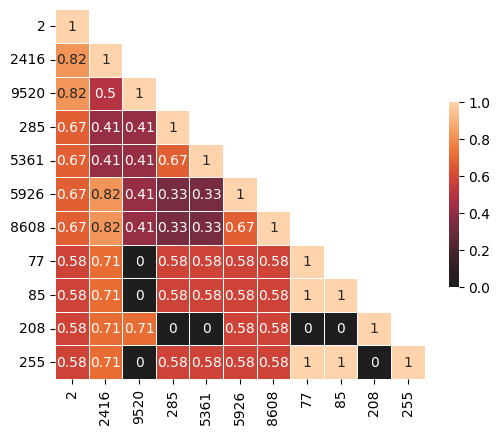

In [21]:
# Plot heatmap 
sns.heatmap(similar_users_df, annot=True, mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Matrix trên là dạng ma trận nửa dưới ứng với mỗi giá trị là sim-score của 2 user
- Càng lớn là càng gần giống
- Càng nhỏ là khá khác nhau

Hãy tập trung vào cột đầu (customer_id 2)
- Customer_id 2416, 9520 có similarity score là 0.82 là 2 user gần nhất với customer-id 2
- Kế tiếp là 4 user 285,5361,5926,8608

## Get recommended items

Và giờ chúng ta comeback lại transaction-table, chọn 4 user top cao điểm nhất

In [22]:
df_tech[df_tech['customer_id'].isin([2,2416,9520, 285, 5926])][['customer_id', 'transaction_datetime', 'product_lvl4', 'rating']]

,customer_id,transaction_datetime,product_lvl4,rating
4,2,2022-12-16 03:40:11,Ốp lưng điện thoại iPhone Silicone,4.7
8,2,2022-12-16 03:40:11,Máy quay phim 4K Panasonic Lumix GH5,4.9
9,2,2022-12-16 03:40:11,iPad Pro,4.9
529,285,2022-03-17 23:42:11,Máy quay phim 4K Panasonic Lumix GH5,4.9
530,285,2022-03-17 23:42:11,iPad Pro,4.9
531,285,2022-03-17 23:42:11,Sony Alpha A7III,3.5
4599,2416,2020-09-08 22:01:44,Ốp lưng điện thoại iPhone Silicone,4.7
4608,2416,2020-09-08 22:01:44,Máy quay phim 4K Panasonic Lumix GH5,4.9
11359,5926,2022-08-31 07:30:50,iPhone 13 Pro,4.8
11360,5926,2022-08-31 07:30:50,Ốp lưng điện thoại iPhone Silicone,4.7


Trong đó:
- **Customer-id 2**: mua Ốp lưng điện thoại Iphone Silicone, Máy quay phim 4K, Panasonic Lumix GH5 và IPad Pro

- **Customer_id 2416, 9520**: mua Ốp lưng điện thoại iPhone Silicone, iPad Pro, Máy quay phim 4K Panasonic Lumix GH5

- **Customer_id 285, 5926**: mua Máy quay phim 4K Panasonic Lumix GH5, iPad Pro, Sony Alpha A7III, iPhone 13 Pro, Ốp lưng điện thoại iPhone Silicone...

Chúng ta thấy rằng có những item sản phẩm giống nhau như thế này chúng ta có thể suggest customer-id 2 mua thêm sản phẩm khác dựa vào sản phẩm của KH 2416, 9520, 285, và 5926

In [23]:
# Lấy những sản phẩm mà customer-id 2 đã mua
item_ci2_bought = set(df_tech[df_tech['customer_id'] == 2]['product_lvl4'].tolist())
item_ci2_bought

{'Máy quay phim 4K Panasonic Lumix GH5',
 'iPad Pro',
 'Ốp lưng điện thoại iPhone Silicone'}

In [24]:
# Lấy những sản phẩm mà 4 KH giống nhất mua
item_sim_ci2 = set(df_tech[df_tech['customer_id'].isin([2416,9520, 285, 5926])]['product_lvl4'].tolist())
item_sim_ci2

{'Máy quay phim 4K Panasonic Lumix GH5',
 'Sony Alpha A7III',
 'iPad Pro',
 'iPhone 13 Pro',
 'Ốp lưng điện thoại iPhone Silicone'}

In [25]:
# Filter ra những sản phẩm mà customer-id 2 chưa mưa
item_ci2_notyet = list(item_sim_ci2 - item_ci2_bought)
item_ci2_notyet

['iPhone 13 Pro', 'Sony Alpha A7III']

Trong trường hợp này, có 2 sản phẩm chúng ta có thể recommend cho customer-id 2.

-  Sony Alpha A7III
- iPhone 13 Pro

Chúng ta sẽ lookup for chất lượng sản phẩm của 2 items này, có 401 transaction cho 2 sản phẩm này

In [26]:
x = df[df['product_lvl4'].isin(item_ci2_notyet)]
x

,transaction_id,transaction_datetime,customer_id,product_id,product_lvl1,product_lvl2,product_lvl3,product_lvl4,brand,price,...,rating,num_sold,quantity,unit_price,total_amount,payment_id,promotion_id,transaction_status,transaction_type,store_id
22,21.0,2022-11-25 07:18:57,8,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,0,33000000,0,7.0,NaN,Đã xác nhận,Mua hàng,8587
25,24.0,2018-10-03 06:32:45,9,6,Thương mại điện tử,Điện thoại di động,Điện thoại iPhone,iPhone 13 Pro,Apple,33000000,...,4.9,1404,2,33000000,66000000,8.0,NaN,Đã giao hàng,Thanh toán trực tuyến,8711
34,33.0,2022-05-18 06:12:16,12,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,0,33000000,0,11.0,34.0,Thành công,Hoàn tiền,8039
44,43.0,2019-09-27 18:53:10,20,130,Điện thoại di động,Smartphone,iPhone,iPhone 13 Pro,Apple,26990000,...,4.8,85,1,26990000,26990000,19.0,44.0,Đã tiếp nhận,Thanh toán,8845
61,59.0,2022-02-12 21:29:43,30,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,2,33000000,66000000,27.0,61.0,Đã hoàn trả,Thẻ tín dụng,8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18874,17263.0,2022-04-24 02:24:33,9878,52,Thương mại điện tử,Máy ảnh,Máy ảnh mirrorless,Sony Alpha A7III,Sony,33000000,...,3.5,71,19,33000000,627000000,10814.0,18874.0,Đã giao hàng,Thanh toán,8591
18968,17354.0,2021-10-19 18:51:17,9921,130,Điện thoại di động,Smartphone,iPhone,iPhone 13 Pro,Apple,26990000,...,4.8,85,0,26990000,0,10859.0,NaN,Đã tiếp nhận,Hoàn tiền,8327
18982,17368.0,2019-11-17 11:49:49,9925,6,Thương mại điện tử,Điện thoại di động,Điện thoại iPhone,iPhone 13 Pro,Apple,33000000,...,4.9,1404,0,33000000,0,10863.0,18982.0,Thành công,Thanh toán,8343
19011,17396.0,2020-05-17 22:40:01,9934,130,Điện thoại di động,Smartphone,iPhone,iPhone 13 Pro,Apple,26990000,...,4.8,85,12,26990000,323880000,10873.0,19011.0,Đã hủy,Mua hàng,8437


Tổng hợp thông tin xung quanh về 2 product này, bao gồm:

- Trung bình rating
- Tổng số lượng đã được bán
- Tổng doanh thu bán được
- Số lượng store bán

In [27]:
x1 = x.groupby('product_lvl4').agg({'rating': 'mean', 'num_sold': 'sum', 'total_amount': 'sum', 'store_id': 'nunique'})
x1.columns = ['mean_rating', 'total_num_sold', 'revenue', 'num_store_sold']
x1

,mean_rating,total_num_sold,revenue,num_store_sold
product_lvl4,,,,
Sony Alpha A7III,3.500000,10011,17127000000,132
iPhone 13 Pro,4.848077,186975,32310130000,237


Ta sẽ chọn chỉ số rating để recommend tức là iPhone13 Pro. Và đó là cách đơn giản bạn có thể recommend item cho user

> Trong trường hợp bạn muốn lấy nhiều hơn recommended-items thì bạn có thể thay đổi topk để lấy nhiều similar users hơn nữa

> Với kết quả trên, chúng ta có thể để Iphone 13 Pro vào top danh sách recommend cho mục "Đồ công nghệ" với user này

Và đó là Data Science cho Recommendation System dựa vào user-similarity

> Assignment 1: bạn hãy thử recommend với customer-id là 30

> Assignment 2: bạn hãy thử tạo matrix user & item liên quan đến rating

# B. Intro AB Testing

AB/Testing là 1 công cụ để giúp bạn đánh giá liệu recommend của bạn có hoạt động tốt ko khi triển khai thực tế

**Đề bài**: Giả sử chúng ta trước đây công ty có 1 recommendation system (hoặc algorithm/approach) khác rồi, giờ bạn muốn thử nghiệm recommendation của bạn có tốt ko khi đi ra môi trường thực tế? Thì đây là lúc bạn chạy A/B Testing

A/B Testing là 1 thử nghiệm dựa trên thống kế hypothesis testing, bao gồm 2 scenario A và B, trong đó:

- A là thử nghiệm bình thường (tức là version recommendation system cũ) hay gọi là **controlled group**
- B là thử nghiệm mới (tức là sử dụng version mới ReC của chúng ta) hay gọi là **challenge/treatment/variation group**

<img src="./static/ab.jpeg" style="width: 500px"/>

AB Testing có thể xuất hiện ở bất cứ bài toán nào, và ReC rất thường xuyên sử dụng

Khi triển khai thử nghiệm mới (B), việc quan trọng là ko làm ảnh hưởng trải nghiệm cá nhân của khách hàng trước khi thực sự thay đổi. Nghĩa là bạn cần chạy thử nghiệm 1 thời gian trên số lượng khách hàng nhỏ để nếu có bad feedback thì chỉ có nhóm KH này thôi (ko làm ảnh hưởng toàn bộ KH)

Với việc bạn thay đổi phiên bản mới liệu ReC Sys của bạn có giúp business gain more revenue hoặc các chỉ số business metrics (AOV, CR, Churn...) có tốt hơn ko?

## Sơ bộ cách triển khai và đánh giá

Với bài toán chúng ta, chúng ta sẽ đánh giá liệu Rec Sys mới có tốt hơn cũ ko trên tập KH sử dụng đồ công nghệ

Bạn sẽ triển khai 2 version và test thử trên 100KH randomly, với 80KH bạn vẫn để xài version A (cũ) và 20KH bạn cho KH sử dụng version B (mới). Xem flow ở dưới


- Tình huống:
  - DS team có RecSys mới đang cần được thử nghiệm có tốt hơn version cũ ko?
  - DS team triển khai model mới và model cũ chạy song song với nhau
  - KH target là nhóm khách hàng thích đồ công nghệ
  - Nhưng đảm bảo rằng, phiên bản mới ko gây ra "negative effect" thì bạn split thí nghiệm của mình ở 1 tỷ lệ vừa phải (đủ nhỏ để ko gây ra tổn thất và ko tốn quá nhiều thời gian)
  - Giả sử thí nghiệm của bạn có kết quả thu được 100KH sau 2 tuần trong đó: 80 version cũ, 20 version mới

<img src="./static/Ab_schema.jpg" style="width: 400px"/>

Với kết quả CR mới là 40% (8/20 KH bấm vào link Iphone) và CR cũ là 25% (20/80 KH bấm vào link Samsung)

Chúng ta có thể kết luận đã đủ dữ liệu chứng minh rằng RecSys mới (version B) tốt hơn phiên bản cũ (version A)?

> **Bạn hãy thử trả lời câu hỏi trên trước khi xem đáp án nhé**

## Kết quả

Với các bạn trả lời là ***Có*** thì không may mắn rằng thực tế những Senior Data Science hoặc statistician sẽ không đồng ý với các bạn mà họ cần 1 vài dẫn chứng như

- significant value (alpha) bằng 5% hay là 1%?
- two tail, one tail test ?
- p-values là bao nhiêu?
- Z-test hay t-test?
- Null hypothesis hay alternative hypothesis là gì?
- Populations là normally distributed hay sample size > 30 ?
- Both populations follow a binominal Distribution ?
- Samples are independent of each other ?
- np and n(1-p) > 5 ?

AB Testing giúp cho các bạn biết rằng liệu số mẫu có thể kết luận được hay chưa hay kết quả trên chỉ là do random by chance

Trong trường hợp này thì thí nghiệm của chúng ta là ***không chắc chắn*** để kết luận rằng version B tốt hơn version A với **significant level = 0.05**. 

Rất tiếc với câu trả lời bạn chọn là **Có** là 1 đáp án chưa chính xác và thỏa đáng để làm báo cáo

> Kết quả: p-value = 0.0907 > 0.05 (alpha) so failed to reject the null-hypothesis

Làm sao để biết khi nào đủ hay ko đủ thì đó là phần nâng cao về AB Testing (chúng ta sẽ tạm thời dừng đây). 

AB Testing cho chúng ta biết được rằng cần phải chạy thử nghiệm bao lâu, có tối thiểu bao nhiêu sample để có thể đưa ra 1 conclusion chắc chắn hơn là 1 sự trùng hợp ngẫu nhiên (random by chance)

## Những hypothesis testing khác

### Với Credit Scoring

1. Kiểm tra và đánh giá trung bình điểm tín dụng của 2 Cohort xem có sự khác nhau đáng kể về mặt thống kê ko?
2. Kiểm tra và đánh giá input đầu vào của 2 Cohort xem có sự khác nhau đáng kể về mặt thống kê ko?
3. Kiểm tra và đánh giá tỷ lệ conversion rate pass application round của 2 quy trình (giả sử là manual review và automated by model)
...

### Với Fraud Detection

1. Kiểm tra và đánh giá khả năng số lượng trường hợp bắt nhầm (False Positive) của model có tốt hơn so với human-process ko?
2. Kiểm tra và đánh giá số tiền save được bởi model có đáng kể về mặt thống kê ko?
...

### Với RecSys

1. Kiểm tra và đánh giá với đề xuất của new model thì doanh thu tăng lên có đáng kể so với version cũ về mặt thống kê hay ko?
2. Kiểm tra và đánh giá với đề xuất của new model thì tỷ lệ mua hàng tăng lên có đáng kể so với version cũ về mặt thống kê hay ko?
3. Kiểm tra và đánh giá với đề xuất của new model thì KH có ở lại lâu hơn có đáng kể so với version cũ về mặt thống kê hay ko?

### Về UI/UX

1. Với thiết kế UI/UX mới có khiến KH ở lại trên website lâu hơn về mặt thống kê hay ko?
2. Với thiết kế UI/UX mới có khiến KH click vào sản phẩm nhiêù hơn về mặt thống kê hay ko?

# C. Conclusion

Chúng ta tới đây là kết thúc bài tập cuối cùng của khóa này. Thông qua bài tập này, bạn đã hiểu 

- Cách thiết kế 1 Rec Sys đơn giản (còn rất nhiều ReC Sys phức tạp hơn bạn nhé)
- Cách tính similar-user behavior dựa trên mua sắm
- Cách đề xuất item cho user ấy
- Hiểu cách triển khai AB Testing và ý nghĩa của nó


Hy vọng những nội dung và bài tập khóa học sẽ giúp bạn có nhiều kiến thức về cách hoạt động, phân tích vấn đề và triển khai bài toán Data Science như thế nào.

Rất vui bạn đã đồng hành với mình khóa học này tới đây. 

Chúc bạn may mắn và thành công trên con đường sự nghiệp Data

Hẹn gặp các bạn ở khóa khác

---

Tác giả/ Người giảng dạy

**Huỳnh Thanh Quan**

Thông tin liên hệ:

- hthquan28@gmail.com
- Zalo: 0969910254